In [1]:
# Import needed libraries 

import pandas as pd 
import os
from datetime import timedelta
import numpy as np 
from scipy.signal import argrelextrema
import alpaca_trade_api as tradeapi 
import matplotlib.pyplot as plt 
import matplotlib.dates as mpdates
from mplfinance.original_flavor import candlestick_ohlc
from dotenv import load_dotenv
from itertools import islice

In [2]:
# Load .env file

load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
ALPACA_ENDPOINT_KEY = os.getenv("ALPACA_END_POINT")

#ensuring api keys are correct 
#print(os.getenv("APCA_API_KEY_ID"))
#print(os.getenv("APCA_API_SECRET_KEY"))
#print(os.getenv("ALPACA_ENDPOINT_KEY"))

# Create the Alpaca API object
api = tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version="v2",
    base_url= ALPACA_ENDPOINT_KEY
)

In [4]:
# Parameters for Stock Data from Alpacas
# Establish time frame (5 minute)

time_frame = "5min"

# Identify what stock symbol is trading

stock_symbol = "QQQ"

# Identify what start date to begin data analysis
# JAN 27 27 2021 GameStop event (GME) are we still doing this?

start_date = pd.Timestamp("2021-01-27", tz="America/New_York").isoformat()

# Identify what end date to finalize data analysis

end_date = pd.Timestamp("2021-1-28", tz="America/New_York").isoformat()

In [5]:
# # Call stock data from identified period of time

# stock_data = api.get_bars(
#     stock_symbol, 
#     time_frame, 
#     start = start_date, 
#     end = end_date
# ).df

In [6]:
# Function to call daily stock data

def get_stock_data(api, stock_symbol, time_frame, start_date, end_date):
    
    # Assuming api.get_bars returns a DataFrame with a 'df' attribute
    
    stock_data = api.get_bars(
        stock_symbol, 
        time_frame, 
        start=start_date, 
        end=end_date
        ).df
    return stock_data

stock_data = get_stock_data(api, stock_symbol, time_frame, start_date, end_date)

In [7]:
# Displays the information pulled for working through code

stock_data.info()
display(stock_data.head())
display(stock_data.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 191 entries, 2021-01-27 09:00:00+00:00 to 2021-01-28 00:55:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        191 non-null    float64
 1   high         191 non-null    float64
 2   low          191 non-null    float64
 3   trade_count  191 non-null    int64  
 4   open         191 non-null    float64
 5   volume       191 non-null    int64  
 6   vwap         191 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.9 KB


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-27 09:00:00+00:00,330.42,330.58,329.93,43,329.93,10740,330.213696
2021-01-27 09:05:00+00:00,330.24,330.36,330.24,34,330.36,3193,330.313439
2021-01-27 09:10:00+00:00,330.21,330.24,330.18,14,330.18,1124,330.211967
2021-01-27 09:15:00+00:00,330.26,330.26,330.25,7,330.25,1360,330.254412
2021-01-27 09:20:00+00:00,330.13,330.25,330.13,10,330.23,1271,330.200189


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-28 00:35:00+00:00,317.14,317.14,316.87,96,316.87,28863,316.995793
2021-01-28 00:40:00+00:00,317.31,317.34,317.10,108,317.21,15182,317.154442
2021-01-28 00:45:00+00:00,317.29,317.47,317.21,108,317.47,18718,317.298227
2021-01-28 00:50:00+00:00,317.00,317.28,317.00,160,317.28,21358,317.156206
2021-01-28 00:55:00+00:00,317.20,317.24,316.99,133,316.99,21514,317.127020


In [8]:
# # Clean up DF keep Open, High, Low, Close, Volume (OHLCV)

# stock_data = stock_data.drop(columns=["trade_count", 'vwap'], axis=1)

# # Convert index

#stock_data.head()

In [9]:
# Isolate closing prices to use for plotting stock data
#close = stock_data['close']

#print(close)

In [10]:
# # Plot the stock data and identified minima

# plt.figure(figsize=(15, 5))

# # Identify degree of polynomial, this can be adjuster at a later date if needed

# polynomial_degree = 75

# # Establishes dimensions for x-axis

# min_length = min(len(stock_data.index), len(stock_data['close']))
# plt.plot(stock_data.index, stock_data["close"], label='Close Prices', alpha=0.7)

# # ***Polynomial Fit***
# # Establish the x-axis

# x_data = np.arange(min_length)

# # Calculate the polynomial coefficients to fit the stock data (OHLC)

# polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
# polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
# polynomial_coefficients_low = np.polyfit(x_data, stock_data['low'][:min_length], polynomial_degree)
# polynomial_coefficients_close = np.polyfit(x_data, stock_data['close'][:min_length], polynomial_degree)

# # Evaluate the polynomial for plotting (OHLC)

# y_polynomial_open = np.polyval(polynomial_coefficients_open, x_data)
# y_polynomial_high = np.polyval(polynomial_coefficients_high, x_data)
# y_polynomial_low = np.polyval(polynomial_coefficients_low, x_data)
# y_polynomial_close = np.polyval(polynomial_coefficients_close, x_data)

# # Review polynomial data

# #print(len(y_polynomial_close))
# #print(y_polynomial_close)

# # Identify Local Extrema for polynomial fit data (minima and maxima)

# local_poly_minima = argrelextrema(y_polynomial_close, np.less, order=5)[0]
# local_poly_maxima = argrelextrema(y_polynomial_close, np.greater, order=5)[0]


# # Plot polynomial fit

# plt.plot(stock_data.index[:min_length], y_polynomial_close, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# # Plot red dots at local minima and blue dots at local maxima

# plt.scatter(stock_data.index[local_poly_minima], y_polynomial_close[local_poly_minima], color='red', label='Local Minima')
# plt.scatter(stock_data.index[local_poly_maxima],y_polynomial_close[local_poly_maxima], color="blue", label = "Local Maxima")

In [11]:
# # Convert the close price polynomial fit data into a dataframe
# # This is done for OHLC poly fit data

# poly_df = pd.DataFrame(y_polynomial_open)
# columns = ['poly_fit_open']
# poly_df.columns = columns
# poly_df = poly_df.assign(poly_fit_high = y_polynomial_high)
# poly_df = poly_df.assign(poly_fit_low = y_polynomial_low)
# poly_df = poly_df.assign(poly_fit_close = y_polynomial_close)

# poly_df.head()

In [12]:
# # Reset the index of the original updated ticker dataframe to concat with the polynomial dataframe that does not include a timeseries
# # This will ensure that the indexed intergers of the ploynomial fit align with the time each data point corresponds to

# updated_stock_data = stock_data.reset_index()
# updated_stock_data = pd.concat([updated_stock_data, poly_df], axis='columns', join='inner')
# updated_stock_data.head()

In [13]:
# # Add minima and maxima column to the DataFrame

# #updated_stock_data[columns = {'minima',"maxima"}] = 0  # Initialize 'minima' column with zeros
# updated_stock_data["minima"] = 0
# updated_stock_data["maxima"] = 0
# updated_stock_data.head()

# # Mark rows with local minima as 1 in the 'minima' column
# # Can we clean this up??? use one for loop with if statements?

# for index in local_poly_minima:
#     updated_stock_data.at[index, 'minima'] = -1

# for index in local_poly_maxima:
#     updated_stock_data.at[index, "maxima"] = 1

# #updated_stock_data.head(50)

In [14]:
# # Create Target Columns - Double Top Target & Double Bottom Target
# updated_stock_data["dbl_top_target"] = 0
# updated_stock_data["dbl_bot_target"] = 0

# updated_stock_data.head()
# updated_stock_data.tail()

In [15]:
# Function to prepare daily stock data to identify double top/bottom patterns and prepare for targets
# Includes establishing a polynomial fit and assigning new columns for localized min/max

# Polynomial Degree

polynomial_degree = 75

def polynomial_min_max_fit(stock_data, polynomial_degree):
    
    min_length = min(len(stock_data.index), len(stock_data['close']))
    x_data = np.arange(min_length)

    # Polynomial fitting
    polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
    polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
    polynomial_coefficients_low = np.polyfit(x_data, stock_data['low'][:min_length], polynomial_degree)
    polynomial_coefficients_close = np.polyfit(x_data, stock_data['close'][:min_length], polynomial_degree)

    # Evaluate the polynomial for plotting
    y_polynomial_open = np.polyval(polynomial_coefficients_open, x_data)
    y_polynomial_high = np.polyval(polynomial_coefficients_high, x_data)
    y_polynomial_low = np.polyval(polynomial_coefficients_low, x_data)
    y_polynomial_close = np.polyval(polynomial_coefficients_close, x_data)

    # Identify local extrema for polynomial fit data (minima and maxima)
    local_poly_minima = argrelextrema(y_polynomial_close, np.less, order=5)[0]
    local_poly_maxima = argrelextrema(y_polynomial_close, np.greater, order=5)[0]

    # Convert the close price polynomial fit data into a dataframe
    # This is done for OHLC poly fit data

    poly_df = pd.DataFrame(y_polynomial_open)
    columns = ['poly_fit_open']
    poly_df.columns = columns
    poly_df = poly_df.assign(poly_fit_high = y_polynomial_high)
    poly_df = poly_df.assign(poly_fit_low = y_polynomial_low)
    poly_df = poly_df.assign(poly_fit_close = y_polynomial_close)

    # Reset the index of the original updated ticker dataframe to concat with the polynomial dataframe that does not include a timeseries
    # This will ensure that the indexed intergers of the ploynomial fit align with the time each data point corresponds to

    updated_stock_data = stock_data.reset_index()
    updated_stock_data = pd.concat([updated_stock_data, poly_df], axis='columns', join='inner')
    updated_stock_data.head()

    # Add minima and maxima column to the DataFrame

    updated_stock_data["minima"] = 0
    updated_stock_data["maxima"] = 0
    updated_stock_data.head()

    # Mark rows with local minima as 1 in the 'minima' column

    for index in local_poly_minima:
        updated_stock_data.at[index, 'minima'] = -1

    for index in local_poly_maxima:
        updated_stock_data.at[index, "maxima"] = 1

    # Create Target Columns - Double Top Target & Double Bottom Target
        
    updated_stock_data["dbl_top_target"] = 0
    updated_stock_data["dbl_bot_target"] = 0

    return updated_stock_data, min_length, y_polynomial_close, local_poly_minima, local_poly_maxima

updated_stock_data, min_length, y_polynomial_close, local_poly_minima, local_poly_maxima = polynomial_min_max_fit(stock_data,polynomial_degree)

c:\Users\JamesDavidson\Anaconda3\envs\mlenv\lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\JamesDavidson\Anaconda3\envs\mlenv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_28408\490055435.py:14: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients_open = np.polyfit(x_data, stock_data['open'][:min_length], polynomial_degree)
C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_28408\490055435.py:15: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients_high = np.polyfit(x_data, stock_data['high'][:min_length], polynomial_degree)
C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_28408\490055435.py:16: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients_low = np.polyfit(x_

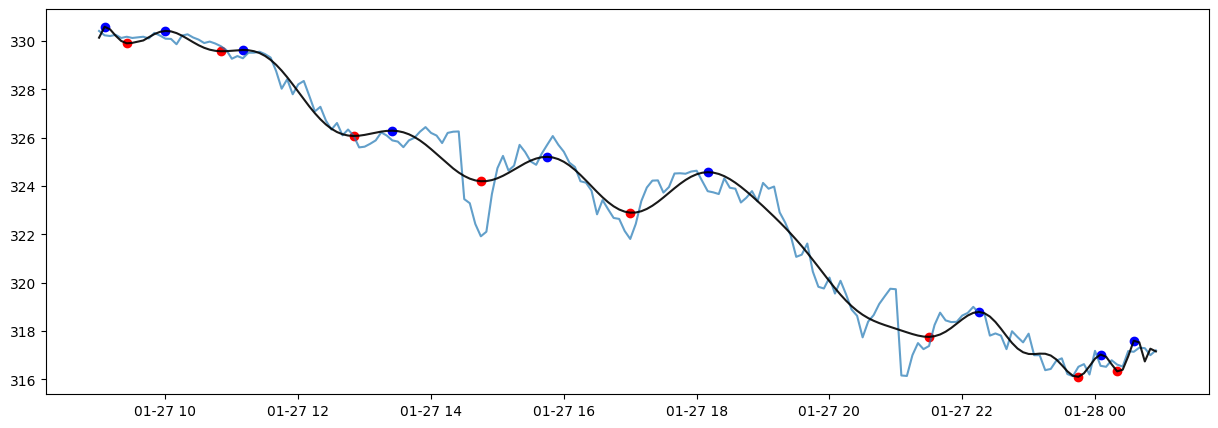

In [16]:
# Plot data
# Plot the stock data and identified minima

plt.figure(figsize=(15, 5))
plt.plot(stock_data.index, stock_data["close"], label='Close Prices', alpha=0.7)

# # Plot polynomial fit

plt.plot(stock_data.index[:min_length], y_polynomial_close, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# # Plot red dots at local minima and blue dots at local maxima

plt.scatter(stock_data.index[local_poly_minima], y_polynomial_close[local_poly_minima], color='red', label='Local Minima')
plt.scatter(stock_data.index[local_poly_maxima],y_polynomial_close[local_poly_maxima], color="blue", label = "Local Maxima")

In [17]:
# Define the time independent DF for double top/bottom identification
# Timestamp remains a column, but can identify pattern from peak to peak immediately

time_independent_df = []
time_independent_df = pd.DataFrame(time_independent_df, columns = ["timestamp","close","high","low","trade_count","open","volume","vwap","poly_fit_open","poly_fit_high","poly_fit_low","poly_fit_close","minima","maxima","dbl_top_target","dbl_bot_target"])

for index, row in islice(updated_stock_data.iterrows(), 0, None):

    # Assign to rows only those that contain local min or max

    if (updated_stock_data.at[index,"minima"] == -1):
        time_independent_df.loc[index] = row
        a = updated_stock_data.iloc[index]["poly_fit_close"]
    elif (updated_stock_data.at[index,"maxima"] == 1):
        time_independent_df.loc[index] = row
        a = updated_stock_data.iloc[index]["poly_fit_close"]

# Reset time dependent index
# Set new time independent index

time_independent_df.reset_index(inplace = True)
time_independent_df.rename(columns={"index":"time_dependent_index"}, inplace = True)

# Data review
        
display(time_independent_df.head(20))
print()
print(row)
print()
print(a)
print(index)
print()
print(len(time_independent_df))

,time_dependent_index,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close,minima,maxima,dbl_top_target,dbl_bot_target
0,1,2021-01-27 09:05:00+00:00,330.24,330.36,330.24,34,330.36,3193,330.313439,330.569698,330.712191,330.483868,330.592768,0,1,0,0
1,5,2021-01-27 09:25:00+00:00,330.18,330.18,330.09,20,330.13,6102,330.125497,329.895812,329.930889,329.882273,329.90893,-1,0,0,0
2,11,2021-01-27 10:00:00+00:00,330.1,330.18,330.02,18,330.13,1886,330.096882,330.427537,330.471851,330.35369,330.420431,0,1,0,0
3,21,2021-01-27 10:50:00+00:00,329.79,329.81,329.74,31,329.8,5102,329.771397,329.537789,329.63309,329.469594,329.580094,-1,0,0,0
4,25,2021-01-27 11:10:00+00:00,329.29,329.44,329.23,51,329.44,6109,329.339158,329.64644,329.721614,329.525349,329.63136,0,1,0,0
5,45,2021-01-27 12:50:00+00:00,326.09,326.48,325.87,193,326.4,40168,326.131713,326.116634,326.764306,325.786405,326.073741,-1,0,0,0
6,52,2021-01-27 13:25:00+00:00,325.89,326.17,325.83,308,326.13,28102,326.007461,326.353595,326.968842,326.18718,326.291877,0,1,0,0
7,68,2021-01-27 14:45:00+00:00,321.9199,323.06,321.6464,17182,322.45,1157445,322.408976,324.189203,324.63963,323.492045,324.200227,-1,0,0,0
8,80,2021-01-27 15:45:00+00:00,325.71,325.7799,325.28,2756,325.36,219508,325.560127,325.21085,325.605733,324.832302,325.209137,0,1,0,0
9,95,2021-01-27 17:00:00+00:00,321.81,322.21,321.81,5161,322.12,454300,322.031952,322.950487,323.302971,322.600745,322.89915,-1,0,0,0



timestamp         2021-01-28 00:55:00+00:00
close                                 317.2
high                                 317.24
low                                  316.99
trade_count                             133
open                                 316.99
volume                                21514
vwap                              317.12702
poly_fit_open                     316.95113
poly_fit_high                    317.200888
poly_fit_low                     316.942866
poly_fit_close                   317.156824
minima                                    0
maxima                                    0
dbl_top_target                            0
dbl_bot_target                            0
Name: 190, dtype: object

317.5965527551964
190

17


In [18]:

# Define the time independent DF for double top/bottom identification
# Timestamp remains a column, but can identify pattern from peak to peak immediately

def time_independent_df(updated_stock_data):

    time_independent_df = []
    time_independent_df = pd.DataFrame(time_independent_df, columns = ["timestamp","close","high","low","trade_count","open","volume","vwap","poly_fit_open","poly_fit_high","poly_fit_low","poly_fit_close","minima","maxima","dbl_top_target","dbl_bot_target"])

    for index, row in islice(updated_stock_data.iterrows(), 0, None):

        # Assign to rows only those that contain local min or max

        if (updated_stock_data.at[index,"minima"] == -1):
            time_independent_df.loc[index] = row
            a = updated_stock_data.iloc[index]["poly_fit_close"]
        elif (updated_stock_data.at[index,"maxima"] == 1):
            time_independent_df.loc[index] = row
            a = updated_stock_data.iloc[index]["poly_fit_close"]

    # Reset time dependent index
    # Set new time independent index

    time_independent_df.reset_index(inplace = True)
    time_independent_df.rename(columns={"index":"time_dependent_index"}, inplace = True)

    return time_independent_df

time_independent_df = time_independent_df(updated_stock_data)

In [19]:
# Initialize variables to identify double top/bottom patterns
# Time dependent variable x_0 will always begin at a local min/max which also coincides
# With the start of a trend into a potential double top/bottom
    
x_0 = 0

# Initiation of double top/bottom variable
    
a = 0

# First peak/valley of double top/bottom pattern
    
b = 0

# Trough/peak of double top/bottom pattern

c = 0

# Second peak/vallye of double top/bottom pattern
    
d = 0

# Trigger of double top/bottom pattern
    
e = 0

# Final time increment to finalize and trigger double top signal
    
x_f_min = 0
x_f_max = 0

In [20]:
# Read through code to identify double top/bottom and assign to target columns.

for index, row in islice(time_independent_df.iterrows(), 0, len(time_independent_df) - 4):

    # Check for double top
    # If found then assigns x_f final time for writing to targets in time dependent dataframe

    if (time_independent_df.at[index,"minima"] == -1):
        a = time_independent_df.iloc[index]["poly_fit_close"]
        b = time_independent_df.iloc[index + 1]["poly_fit_close"]
        c = time_independent_df.iloc[index + 2]["poly_fit_close"]
        d = time_independent_df.iloc[index + 3]["poly_fit_close"]
        e = time_independent_df.iloc[index + 4]["poly_fit_close"]
        x_0 = time_independent_df.iloc[index]["time_dependent_index"]
        print(a)
        print(b)
        print(c)
        print(d)
        print(e)
        print(x_0)
        if (time_independent_df.iloc[index + 1]["poly_fit_low"]) < d < (time_independent_df.iloc[index + 1]["poly_fit_high"]) and (e < c):
            x_f_max = time_independent_df.iloc[index + 4]["time_dependent_index"]
            while (x_0 < x_f_max + 1):
                updated_stock_data.at[x_0, "dbl_top_target"] = 1
                x_0 = x_0 + 1
            break

   # Check for double bottom
   # If found then assigns x_f final time for writing to targets in time dependent dataframe
            
    elif (time_independent_df.at[index,"maxima"] == 1):
        a = time_independent_df.iloc[index]["poly_fit_close"]
        b = time_independent_df.iloc[index + 1]["poly_fit_close"]
        c = time_independent_df.iloc[index + 2]["poly_fit_close"]
        d = time_independent_df.iloc[index + 3]["poly_fit_close"]
        e = time_independent_df.iloc[index + 4]["poly_fit_close"]
        x_0 = time_independent_df.iloc[index]["time_dependent_index"] 
        print(a)
        print(b)
        print(c)
        print(d)
        print(e)
        print(x_0)
        if (time_independent_df.iloc[index + 1]["poly_fit_low"]) < d < (time_independent_df.iloc[index + 1]["poly_fit_high"]) and (e > c):
            x_f_min = time_independent_df.iloc[index + 4]["time_dependent_index"]
            while (x_0 < x_f_min + 1):
                updated_stock_data.at[x_0, "dbl_bot_target"] = 1
                x_0 = x_0 + 1
            break

#print(x_f)

330.5927681790135
329.9089296995804
330.4204313720146
329.5800941172784
329.631359816215
1
329.9089296995804
330.4204313720146
329.5800941172784
329.631359816215
326.07374081918044
5
330.4204313720146
329.5800941172784
329.631359816215
326.07374081918044
326.291876663693
11
329.5800941172784
329.631359816215
326.07374081918044
326.291876663693
324.2002269527892
21
329.631359816215
326.07374081918044
326.291876663693
324.2002269527892
325.20913712099843
25
326.07374081918044
326.291876663693
324.2002269527892
325.20913712099843
322.8991504243251
45
326.291876663693
324.2002269527892
325.20913712099843
322.8991504243251
324.5740738712697
52
324.2002269527892
325.20913712099843
322.8991504243251
324.5740738712697
317.75883085014397
68
325.20913712099843
322.8991504243251
324.5740738712697
317.75883085014397
318.78889835290846
80
322.8991504243251
324.5740738712697
317.75883085014397
318.78889835290846
316.10607757940863
95
324.5740738712697
317.75883085014397
318.78889835290846
316.106077

In [21]:
# Function to identify daily double top/bottom patterns
# Inherently there should only be 1 identification of the pattern as it is considered a trend reversal pattern
# The loop will break once the pattern is identified

def identify_double_patterns(time_independent_df, updated_stock_data):

    # Initialize variables to identify double top/bottom patterns
    # Time dependent variable x_0 will always begin at a local min/max which also coincides
    # With the start of a trend into a potential double top/bottom
    
    x_0 = 0

    # Initiation of double top/bottom variable
    
    a = 0

    # First peak/valley of double top/bottom pattern
    
    b = 0

    # Trough/peak of double top/bottom pattern

    c = 0

    # Second peak/vallye of double top/bottom pattern
    
    d = 0

    # Trigger of double top/bottom pattern
    
    e = 0

    # Final time increment to finalize and trigger double top signal
    
    x_f = 0

    # Read through code to identify double top/bottom and assign to target columns.

    for index, row in islice(time_independent_df.iterrows(), 0, len(time_independent_df) - 4):

        # Check for double top
        # If found then assigns x_f final time for writing to targets in time dependent dataframe

        if (time_independent_df.at[index,"minima"] == -1):
            a = time_independent_df.iloc[index]["poly_fit_close"]
            b = time_independent_df.iloc[index + 1]["poly_fit_close"]
            c = time_independent_df.iloc[index + 2]["poly_fit_close"]
            d = time_independent_df.iloc[index + 3]["poly_fit_close"]
            e = time_independent_df.iloc[index + 4]["poly_fit_close"]
            x_0 = time_independent_df.iloc[index]["time_dependent_index"]
            print(a)
            print(b)
            print(c)
            print(d)
            print(e)
            print(x_0)
            if (time_independent_df.iloc[index + 1]["poly_fit_low"]) < d < (time_independent_df.iloc[index + 1]["poly_fit_high"]) and (e < c):
                x_f = time_independent_df.iloc[index + 4]["time_dependent_index"]
                while (x_0 < x_f + 1):
                    updated_stock_data.at[x_0, "dbl_top_target"] = 1
                    x_0 = x_0 + 1
                break

        # Check for double bottom
        # If found then assigns x_f final time for writing to targets in time dependent dataframe
            
        elif (time_independent_df.at[index,"maxima"] == 1):
            a = time_independent_df.iloc[index]["poly_fit_close"]
            b = time_independent_df.iloc[index + 1]["poly_fit_close"]
            c = time_independent_df.iloc[index + 2]["poly_fit_close"]
            d = time_independent_df.iloc[index + 3]["poly_fit_close"]
            e = time_independent_df.iloc[index + 4]["poly_fit_close"]
            x_0 = time_independent_df.iloc[index]["time_dependent_index"] 
            print(a)
            print(b)
            print(c)
            print(d)
            print(e)
            print(x_0)
            if (time_independent_df.iloc[index + 1]["poly_fit_low"]) < d < (time_independent_df.iloc[index + 1]["poly_fit_high"]) and (e > c):
                x_f_min = time_independent_df.iloc[index + 4]["time_dependent_index"]
                while (x_0 < x_f + 1):
                    updated_stock_data.at[x_0, "dbl_bot_target"] = 1
                    x_0 = x_0 + 1
                break
            
    return updated_stock_data, x_f

updated_stock_data, x_f = identify_double_patterns(time_independent_df,updated_stock_data)

print(x_f)

330.5927681790135
329.9089296995804
330.4204313720146
329.5800941172784
329.631359816215
1
329.9089296995804
330.4204313720146
329.5800941172784
329.631359816215
326.07374081918044
5
330.4204313720146
329.5800941172784
329.631359816215
326.07374081918044
326.291876663693
11
329.5800941172784
329.631359816215
326.07374081918044
326.291876663693
324.2002269527892
21
329.631359816215
326.07374081918044
326.291876663693
324.2002269527892
325.20913712099843
25
326.07374081918044
326.291876663693
324.2002269527892
325.20913712099843
322.8991504243251
45
326.291876663693
324.2002269527892
325.20913712099843
322.8991504243251
324.5740738712697
52
324.2002269527892
325.20913712099843
322.8991504243251
324.5740738712697
317.75883085014397
68
325.20913712099843
322.8991504243251
324.5740738712697
317.75883085014397
318.78889835290846
80
322.8991504243251
324.5740738712697
317.75883085014397
318.78889835290846
316.10607757940863
95
324.5740738712697
317.75883085014397
318.78889835290846
316.106077

In [22]:
# Data Checking

display(updated_stock_data.head(20))
print(updated_stock_data.loc[x_f])

,timestamp,close,high,low,trade_count,open,volume,vwap,poly_fit_open,poly_fit_high,poly_fit_low,poly_fit_close,minima,maxima,dbl_top_target,dbl_bot_target
0,2021-01-27 09:00:00+00:00,330.42,330.58,329.93,43,329.93,10740,330.213696,329.655083,330.273267,329.685633,330.141081,0,0,0,0
1,2021-01-27 09:05:00+00:00,330.24,330.36,330.24,34,330.36,3193,330.313439,330.569698,330.712191,330.483868,330.592768,0,1,0,0
2,2021-01-27 09:10:00+00:00,330.21,330.24,330.18,14,330.18,1124,330.211967,330.608947,330.574076,330.503408,330.483865,0,0,0,0
3,2021-01-27 09:15:00+00:00,330.26,330.26,330.25,7,330.25,1360,330.254412,330.340809,330.282053,330.259852,330.222077,0,0,0,0
4,2021-01-27 09:20:00+00:00,330.13,330.25,330.13,10,330.23,1271,330.200189,330.061617,330.043107,330.017275,330.006766,0,0,0,0
5,2021-01-27 09:25:00+00:00,330.18,330.18,330.09,20,330.13,6102,330.125497,329.895812,329.930889,329.882273,329.908930,-1,0,0,0
6,2021-01-27 09:30:00+00:00,330.13,330.22,330.10,13,330.17,3970,330.135736,329.866963,329.943925,329.870482,329.927378,0,0,0,0
7,2021-01-27 09:40:00+00:00,330.18,330.18,330.18,5,330.18,783,330.180000,329.946589,330.044947,329.951914,330.026649,0,0,0,0
8,2021-01-27 09:45:00+00:00,330.11,330.16,330.11,3,330.16,300,330.138333,330.086138,330.186044,330.080304,330.161211,0,0,0,0
9,2021-01-27 09:50:00+00:00,330.34,330.34,330.23,12,330.23,5852,330.332467,330.236503,330.323422,330.210699,330.289636,0,0,0,0


timestamp         2021-01-27 09:00:00+00:00
close                                330.42
high                                 330.58
low                                  329.93
trade_count                              43
open                                 329.93
volume                                10740
vwap                             330.213696
poly_fit_open                    329.655083
poly_fit_high                    330.273267
poly_fit_low                     329.685633
poly_fit_close                   330.141081
minima                                    0
maxima                                    0
dbl_top_target                            0
dbl_bot_target                            0
Name: 0, dtype: object
